# Import the libraries 

In [9]:
#import the reqired libraries
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.sparse
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds
import warnings; warnings.simplefilter('ignore')
%matplotlib inline

# Load the dataset and add headers

In [10]:
# Import the dataset and give the column names
# columns=['userId', 'productId', 'ratings','timestamp']
user_df=pd.read_excel('new_userhotelrating_small.xlsx')

In [11]:
user_df.head()

,user,product_code,rating
0,user_78131,hotel_558,3
1,user_78131,hotel_603,2
2,user_78131,hotel_610,3
3,user_78131,hotel_574,3
4,user_78131,hotel_570,3


# Dropping the timestamp column

In [13]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49999 entries, 0 to 49998
Data columns (total 3 columns):
user            49999 non-null object
product_code    49999 non-null object
rating          49999 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.1+ MB


In [14]:
#Check the number of rows and columns
rows,columns = user_df.shape
print('Number of rows: ',rows)
print('Number of columns: ',columns)

Number of rows:  49999
Number of columns:  3


In [15]:
#Check the datatypes
user_df.dtypes

user            object
product_code    object
rating           int64
dtype: object

* Since the data is very big. Consider electronics_df1 named dataframe with  first 50000 rows and all columns from 0 of dataset.

In [18]:
#Summary statistics of rating variable
user_df['rating'].describe().transpose()

count    49999.000000
mean         3.276046
std          1.111922
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: rating, dtype: float64

In [19]:
#Find the minimum and maximum ratings

print('Minimum rating is: %d' %(user_df.rating.min()))
print('Maximum rating is: %d' %(user_df.rating.max()))

Minimum rating is: 1
Maximum rating is: 5


* Rating are on the scale 1 to 5.

# Handling Missing values

In [20]:
user_df = user_df.dropna()

In [21]:
#Check for missing values
print('Number of missing values across columns: \n',user_df.isnull().sum())

Number of missing values across columns: 
 user            0
product_code    0
rating          0
dtype: int64


* There are no missing records in the dataset.

## Ratings

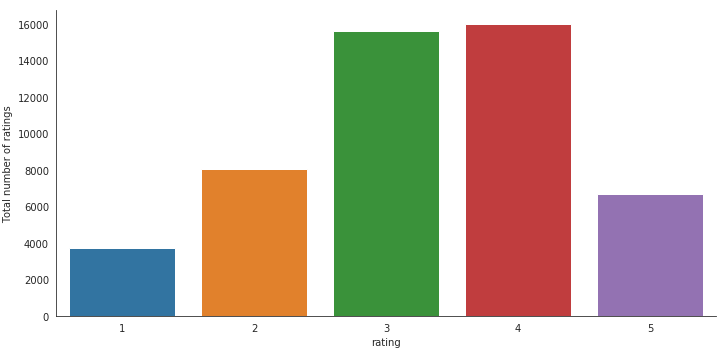

In [22]:
# Check the distribution of the rating
with sns.axes_style('white'):
    g = sns.factorplot("rating", data=user_df, aspect=2.0,kind='count')
    g.set_ylabels("Total number of ratings") 

* We can see that more number of users have given the rating of 5.

## Users and products

In [58]:
# Number of unique user id  in the data
print('Number of unique users in Raw data = ', user_df['user'].nunique())
# Number of unique product id  in the data
print('Number of unique hotels in Raw data = ', user_df['product_code'].nunique())

Number of unique users in Raw data =  915
Number of unique hotels in Raw data =  130


In [59]:
#Check the top 10 users based on ratings
most_rated = user_df.groupby('user').size().sort_values(ascending=False)[:10]
print('Top 10 users based on ratings: \n',most_rated)

Top 10 users based on ratings: 
 user
user_42069    69
user_56548    67
user_60087    67
user_60192    65
user_62269    64
user_75963    64
user_76717    64
user_61499    64
user_43213    64
user_26648    64
dtype: int64


In [25]:
counts = user_df.user.value_counts()

In [26]:
counts

user_42069    69
user_60087    67
user_56548    67
user_60192    65
user_77152    64
user_61499    64
user_77882    64
user_65120    64
user_75963    64
user_43213    64
user_62269    64
user_26648    64
user_76717    64
user_46898    63
user_79884    63
user_79520    63
user_45377    63
user_25172    63
user_21062    63
user_33032    63
user_77347    63
user_79189    63
user_29900    63
user_77183    63
user_77949    63
user_29802    63
user_36596    63
user_79614    63
user_78632    63
user_41193    63
              ..
user_26282    41
user_53578    41
user_33438    41
user_30386    41
user_65416    41
user_57703    41
user_71452    41
user_48087    41
user_54190    41
user_51875    41
user_46028    41
user_77777    40
user_56352    40
user_59581    40
user_22931    40
user_33993    40
user_43358    39
user_25931    39
user_36685    39
user_24128    39
user_76634    39
user_41894    39
user_58973    38
user_41399    38
user_50321    38
user_29335    38
user_77816    37
user_36798    

In [27]:
user_df_final = user_df[user_df.user.isin(counts[counts>=50].index)]

In [61]:
print('Number of users who have rated 50 or more hotels =', len(user_df_final))
print('Number of unique users in the final data = ', user_df_final['user'].nunique())
print('Number of unique Hotels in the final data = ', user_df_final['product_code'].nunique())

Number of users who have rated 50 or more hotels = 40452
Number of unique users in the final data =  700
Number of unique Hotels in the final data =  130


## ratings analysis in final dataset

In [31]:
user_df_final.shape

(40452, 3)

In [32]:
#constructing the pivot table
final_ratings_matrix = user_df_final.pivot_table(index='user',columns='product_code',values='rating')
# final_ratings_matrix = electronics_df1_final.pivot(index = 'product_code', columns ='user', values = 'rating').fillna(0)

In [33]:
final_ratings_matrix

product_code,hotel_501,hotel_502,hotel_503,hotel_504,hotel_506,hotel_507,hotel_508,hotel_509,hotel_510,hotel_511,...,hotel_630,hotel_631,hotel_632,hotel_633,hotel_634,hotel_635,hotel_636,hotel_637,hotel_639,hotel_640
user,,,,,,,,,,,,,,,,,,,,,
user_21025,NaN,NaN,NaN,2.0,NaN,NaN,NaN,3.0,3.0,2.0,...,NaN,2.0,NaN,NaN,4.0,2.0,NaN,NaN,3.0,3.0
user_21042,NaN,NaN,NaN,NaN,4.0,NaN,3.0,NaN,3.0,NaN,...,NaN,NaN,2.0,NaN,NaN,NaN,2.0,NaN,2.0,NaN
user_21051,NaN,2.0,5.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,5.0,5.0,NaN,NaN,5.0,5.0,5.0,5.0,NaN,5.0
user_21054,NaN,1.0,NaN,1.0,NaN,3.0,4.0,2.0,NaN,4.0,...,4.0,NaN,NaN,NaN,3.0,2.0,1.0,2.0,4.0,4.0
user_21062,NaN,NaN,5.0,NaN,4.0,NaN,5.0,2.0,4.0,NaN,...,4.0,3.0,NaN,NaN,5.0,5.0,NaN,NaN,5.0,5.0
user_21073,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,3.0,NaN,2.0
user_21101,NaN,2.0,5.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.0,NaN,5.0,5.0,4.0,NaN
user_21114,NaN,NaN,NaN,5.0,5.0,5.0,4.0,NaN,4.0,5.0,...,5.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,5.0
user_21117,NaN,NaN,1.0,1.0,5.0,NaN,NaN,5.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,2.0


* It shows that it is a sparse matrix. So, many cells are filled with 0 values.

In [62]:
print('Shape of final_ratings_matrix: ', final_ratings_matrix.shape)

Shape of final_ratings_matrix:  (700, 130)


In [36]:
train_data = user_df_final

#  Building Collaborative Filtering recommender model.

In [64]:
user_df_CF = train_data
user_df_CF.head()

,user,product_code,rating
173,user_36448,hotel_588,2
174,user_36448,hotel_620,2
175,user_36448,hotel_552,1
176,user_36448,hotel_555,3
177,user_36448,hotel_557,1


## User Based Collaborative Filtering model

In [65]:
# Matrix with row per 'user' and column per 'item' 
pivot_df = user_df_CF.pivot_table(index = 'user', columns ='product_code', values = 'rating').fillna(0)

In [66]:
pivot_df.head()

product_code,hotel_501,hotel_502,hotel_503,hotel_504,hotel_506,hotel_507,hotel_508,hotel_509,hotel_510,hotel_511,...,hotel_630,hotel_631,hotel_632,hotel_633,hotel_634,hotel_635,hotel_636,hotel_637,hotel_639,hotel_640
user,,,,,,,,,,,,,,,,,,,,,
user_21025,0.0,0.0,0.0,2.0,0.0,0.0,0.0,3.0,3.0,2.0,...,0.0,2.0,0.0,0.0,4.0,2.0,0.0,0.0,3.0,3.0
user_21042,0.0,0.0,0.0,0.0,4.0,0.0,3.0,0.0,3.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0
user_21051,0.0,2.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,5.0,5.0,0.0,0.0,5.0,5.0,5.0,5.0,0.0,5.0
user_21054,0.0,1.0,0.0,1.0,0.0,3.0,4.0,2.0,0.0,4.0,...,4.0,0.0,0.0,0.0,3.0,2.0,1.0,2.0,4.0,4.0
user_21062,0.0,0.0,5.0,0.0,4.0,0.0,5.0,2.0,4.0,0.0,...,4.0,3.0,0.0,0.0,5.0,5.0,0.0,0.0,5.0,5.0


In [67]:
print('Shape of the pivot table: ', pivot_df.shape)

Shape of the pivot table:  (700, 130)


In [41]:
#define user index from 0 to 10
pivot_df['user_index'] = np.arange(0, pivot_df.shape[0], 1)
pivot_df.head()

product_code,hotel_501,hotel_502,hotel_503,hotel_504,hotel_506,hotel_507,hotel_508,hotel_509,hotel_510,hotel_511,...,hotel_631,hotel_632,hotel_633,hotel_634,hotel_635,hotel_636,hotel_637,hotel_639,hotel_640,user_index
user,,,,,,,,,,,,,,,,,,,,,
user_21025,0.0,0.0,0.0,2.0,0.0,0.0,0.0,3.0,3.0,2.0,...,2.0,0.0,0.0,4.0,2.0,0.0,0.0,3.0,3.0,0
user_21042,0.0,0.0,0.0,0.0,4.0,0.0,3.0,0.0,3.0,0.0,...,0.0,2.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,1
user_21051,0.0,2.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,5.0,5.0,5.0,5.0,0.0,5.0,2
user_21054,0.0,1.0,0.0,1.0,0.0,3.0,4.0,2.0,0.0,4.0,...,0.0,0.0,0.0,3.0,2.0,1.0,2.0,4.0,4.0,3
user_21062,0.0,0.0,5.0,0.0,4.0,0.0,5.0,2.0,4.0,0.0,...,3.0,0.0,0.0,5.0,5.0,0.0,0.0,5.0,5.0,4


In [42]:
pivot_df.set_index(['user_index'], inplace=True)
# Actual ratings given by users
pivot_df.head()

product_code,hotel_501,hotel_502,hotel_503,hotel_504,hotel_506,hotel_507,hotel_508,hotel_509,hotel_510,hotel_511,...,hotel_630,hotel_631,hotel_632,hotel_633,hotel_634,hotel_635,hotel_636,hotel_637,hotel_639,hotel_640
user_index,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,3.0,3.0,2.0,...,0.0,2.0,0.0,0.0,4.0,2.0,0.0,0.0,3.0,3.0
1,0.0,0.0,0.0,0.0,4.0,0.0,3.0,0.0,3.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0
2,0.0,2.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,5.0,5.0,0.0,0.0,5.0,5.0,5.0,5.0,0.0,5.0
3,0.0,1.0,0.0,1.0,0.0,3.0,4.0,2.0,0.0,4.0,...,4.0,0.0,0.0,0.0,3.0,2.0,1.0,2.0,4.0,4.0
4,0.0,0.0,5.0,0.0,4.0,0.0,5.0,2.0,4.0,0.0,...,4.0,3.0,0.0,0.0,5.0,5.0,0.0,0.0,5.0,5.0


* As this is a sparse matrix we will use SVD.

### Singular Value Decomposition

In [68]:
# # Singular Value Decomposition
U, sigma, Vt = svds(pivot_df, k = 10)

* As sigma is not a diagonal matrix we have to convert it into diagonal matrix.

In [69]:
# Construct diagonal array in SVD
sigma = np.diag(sigma)
print('Diagonal matrix: \n',sigma)

Diagonal matrix: 
 [[ 66.38743797   0.           0.           0.           0.
    0.           0.           0.           0.           0.        ]
 [  0.          67.11457666   0.           0.           0.
    0.           0.           0.           0.           0.        ]
 [  0.           0.          68.23270633   0.           0.
    0.           0.           0.           0.           0.        ]
 [  0.           0.           0.          69.75438843   0.
    0.           0.           0.           0.           0.        ]
 [  0.           0.           0.           0.          71.46248185
    0.           0.           0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
   76.94582977   0.           0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
    0.          79.87913217   0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
    0.           0.      

In [70]:
#Predicted ratings
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 

# Convert predicted ratings to dataframe
preds_df = pd.DataFrame(all_user_predicted_ratings, columns = pivot_df.columns)

preds_df.head()

product_code,hotel_501,hotel_502,hotel_503,hotel_504,hotel_506,hotel_507,hotel_508,hotel_509,hotel_510,hotel_511,...,hotel_630,hotel_631,hotel_632,hotel_633,hotel_634,hotel_635,hotel_636,hotel_637,hotel_639,hotel_640
0,-0.096789,1.034509,1.383929,1.663602,1.009169,1.691402,0.599254,2.602911,1.765360,2.065882,...,1.004324,1.865991,1.767966,0.389895,1.420418,1.384634,1.427889,1.199348,1.958738,2.787864
1,0.006705,-0.005670,1.114070,-0.474629,3.837152,0.350783,3.523299,-0.115355,1.716985,1.392839,...,1.482291,-0.058659,2.948129,1.078698,0.224401,1.009667,1.467482,1.204079,2.585553,-0.289212
2,0.021045,2.763175,4.931197,-1.110939,4.838245,-0.701957,0.529466,0.659401,1.434129,0.444982,...,5.911668,4.685735,0.512226,-0.197175,5.250320,4.559864,4.299327,3.002678,-0.139977,4.336174
3,-0.102756,1.073224,1.581691,0.852887,0.147235,2.273932,1.273318,2.245275,1.589157,1.641504,...,2.144397,1.950974,1.781610,0.973107,1.945363,1.628355,1.660860,1.862515,1.906961,2.012818
4,0.393383,2.577011,2.900884,1.251278,1.442382,3.106558,2.547102,1.963861,2.083440,1.306952,...,3.738350,3.592562,2.047177,2.406904,3.900762,2.277428,2.478403,3.025854,1.219250,3.067270


In [95]:
# Recommend the items with the highest predicted ratings

def recommend_items(userID, pivot_df, preds_df, num_recommendations):
    # index starts at 0  
    user_idx = userID
    # Get and sort the user's ratings
    sorted_user_ratings = pivot_df.iloc[user_idx].sort_values(ascending=False)
#     print(sorted_user_ratings)
    #sorted_user_ratings
    sorted_user_predictions = preds_df.iloc[user_idx].sort_values(ascending=False)
#     print(sorted_user_predictions)
    #sorted_user_predictions
    temp = pd.concat([sorted_user_ratings, sorted_user_predictions], axis=1)
    temp.index.name = 'Recommended Items'
    temp.columns = ['user_ratings', 'user_predictions']
    temp = temp.loc[temp.user_ratings == 0]   
    temp = temp.sort_values('user_predictions', ascending=False)
    print('\nBelow are the recommended Hotels for (user_id = {}):\n'.format(userID))
    print(temp.head(num_recommendations))

In [96]:
userID = 3
num_recommendations = 5
recommend_items(userID, pivot_df, preds_df, num_recommendations)    


Below are the recommended Hotels for (user_id = 3):

                   user_ratings  user_predictions
Recommended Items                                
hotel_538                   0.0          2.041016
hotel_631                   0.0          1.950974
hotel_595                   0.0          1.938100
hotel_523                   0.0          1.897113
hotel_550                   0.0          1.894111


In [38]:
userID = 6
num_recommendations = 5
recommend_items(userID, pivot_df, preds_df, num_recommendations)


Below are the recommended items for user(user_id = 6):

                   user_ratings  user_predictions
Recommended Items                                
16                          0.0          0.484337
2                           0.0          0.248750
4                           0.0          0.124852
8                           0.0         -0.006331
14                          0.0         -0.025243


In [39]:
userID = 8
num_recommendations = 5
recommend_items(userID, pivot_df, preds_df, num_recommendations)


Below are the recommended items for user(user_id = 8):

                   user_ratings  user_predictions
Recommended Items                                
4                           0.0          0.348467
2                           0.0         -0.070681
6                           0.0         -0.134996
8                           0.0         -0.281948


In [57]:
# Actual ratings given by the users
final_ratings_matrix.head()

# Average ACTUAL rating for each item
final_ratings_matrix.mean().head()

# Predicted ratings 
preds_df.head()

# Average PREDICTED rating for each item
preds_df.mean().head()

rmse_df = pd.concat([final_ratings_matrix.mean(), preds_df.mean()], axis=1)
rmse_df.columns = ['Avg_actual_ratings', 'Avg_predicted_ratings']
print(rmse_df.shape)
rmse_df['item_index'] = np.arange(0, rmse_df.shape[0], 1)
rmse_df.head()

RMSE = round((((rmse_df.Avg_actual_ratings - rmse_df.Avg_predicted_ratings) ** 2).mean() ** 0.5), 5)
print('\nRMSE SVD Model = {} \n'.format(RMSE))
#error rate

(130, 2)

RMSE SVD Model = 1.86439 



* Since, it is a Collaborative recommender model, so, all the three users are given different recommendations based on users past behaviour.